In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn import metrics
import seaborn as sns
import os

In [2]:
telecom=pd.read_csv("training_data.csv")
telecom.head(10)

,City,Gender,Senior_Citizen,Tenure_Months,Phone_Service,Internet_Service,Streaming TV,Streaming Movies,Contract,Payment Method,Monthly Charges,Total_Charges,Churn
0,Los Angeles,Male,No,2,Yes,DSL,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
1,Los Angeles,Female,No,2,Yes,Fiber optic,No,No,Month-to-month,Electronic check,70.70,151.65,Yes
2,Los Angeles,Female,No,8,Yes,Fiber optic,Yes,Yes,Month-to-month,Electronic check,99.65,820.5,Yes
3,Los Angeles,Female,No,28,Yes,Fiber optic,Yes,Yes,Month-to-month,Electronic check,104.80,3046.05,Yes
4,Los Angeles,Male,No,49,Yes,Fiber optic,Yes,Yes,Month-to-month,Bank transfer (automatic),103.70,5036.3,Yes
5,Los Angeles,Female,No,10,Yes,DSL,No,No,Month-to-month,Credit card (automatic),55.20,528.35,Yes
6,Los Angeles,Male,Yes,1,No,DSL,No,Yes,Month-to-month,Electronic check,39.65,39.65,Yes
7,Los Angeles,Male,No,1,Yes,No,No internet service,No internet service,Month-to-month,Mailed check,20.15,20.15,Yes
8,Los Angeles,Male,No,47,Yes,Fiber optic,Yes,Yes,Month-to-month,Electronic check,99.35,4749.15,Yes
9,Los Angeles,Male,No,1,No,DSL,No,No,Month-to-month,Electronic check,30.20,30.2,Yes


In [3]:
telecom.shape

(7043, 13)

In [4]:
telecom.shape
telecom.drop("City", axis=1, inplace=True)
telecom.tail(10)


,Gender,Senior_Citizen,Tenure_Months,Phone_Service,Internet_Service,Streaming TV,Streaming Movies,Contract,Payment Method,Monthly Charges,Total_Charges,Churn
7033,Female,No,2,Yes,No,No internet service,No internet service,Month-to-month,Mailed check,20.05,39.25,No
7034,Male,Yes,55,Yes,DSL,No,No,One year,Credit card (automatic),60.00,3316.1,No
7035,Male,No,38,Yes,Fiber optic,No,No,Month-to-month,Credit card (automatic),69.50,2625.25,No
7036,Male,No,19,Yes,Fiber optic,Yes,No,Month-to-month,Bank transfer (automatic),78.70,1495.1,No
7037,Female,No,12,No,DSL,Yes,Yes,One year,Electronic check,60.65,743.3,No
7038,Female,No,72,Yes,No,No internet service,No internet service,Two year,Bank transfer (automatic),21.15,1419.4,No
7039,Male,No,24,Yes,DSL,Yes,Yes,One year,Mailed check,84.80,1990.5,No
7040,Female,No,72,Yes,Fiber optic,Yes,Yes,One year,Credit card (automatic),103.20,7362.9,No
7041,Female,No,11,No,DSL,No,No,Month-to-month,Electronic check,29.60,346.45,No
7042,Male,No,66,Yes,Fiber optic,Yes,Yes,Two year,Bank transfer (automatic),105.65,6844.5,No


In [5]:
for col in telecom.columns:
    print(f"{col}: {telecom[col].nunique()} unique values")


Gender: 2 unique values
Senior_Citizen: 2 unique values
Tenure_Months: 73 unique values
Phone_Service: 2 unique values
Internet_Service: 3 unique values
Streaming TV: 3 unique values
Streaming Movies: 3 unique values
Contract: 3 unique values
Payment Method: 4 unique values
Monthly Charges: 1585 unique values
Total_Charges: 6531 unique values
Churn: 2 unique values


In [6]:
for col in telecom.columns:
    if telecom[col].dtype == 'object':
        telecom[col], _ = pd.factorize(telecom[col])

telecom.head(10)

,Gender,Senior_Citizen,Tenure_Months,Phone_Service,Internet_Service,Streaming TV,Streaming Movies,Contract,Payment Method,Monthly Charges,Total_Charges,Churn
0,0,0,2,0,0,0,0,0,0,53.85,0,0
1,1,0,2,0,1,0,0,0,1,70.70,1,0
2,1,0,8,0,1,1,1,0,1,99.65,2,0
3,1,0,28,0,1,1,1,0,1,104.80,3,0
4,0,0,49,0,1,1,1,0,2,103.70,4,0
5,1,0,10,0,0,0,0,0,3,55.20,5,0
6,0,1,1,1,0,0,1,0,1,39.65,6,0
7,0,0,1,0,2,2,2,0,0,20.15,7,0
8,0,0,47,0,1,1,1,0,1,99.35,8,0
9,0,0,1,1,0,0,0,0,1,30.20,9,0


In [7]:
telecom.tail(10)

,Gender,Senior_Citizen,Tenure_Months,Phone_Service,Internet_Service,Streaming TV,Streaming Movies,Contract,Payment Method,Monthly Charges,Total_Charges,Churn
7033,1,0,2,0,2,2,2,0,0,20.05,6521,1
7034,0,1,55,0,0,0,0,2,3,60.00,6522,1
7035,0,0,38,0,1,0,0,0,3,69.50,6523,1
7036,0,0,19,0,1,1,0,0,2,78.70,6524,1
7037,1,0,12,1,0,1,1,2,1,60.65,6525,1
7038,1,0,72,0,2,2,2,1,2,21.15,6526,1
7039,0,0,24,0,0,1,1,2,0,84.80,6527,1
7040,1,0,72,0,1,1,1,2,3,103.20,6528,1
7041,1,0,11,1,0,0,0,0,1,29.60,6529,1
7042,0,0,66,0,1,1,1,1,2,105.65,6530,1


In [8]:
X = telecom.drop('Churn',axis=1)
y = telecom['Churn']
# devide the dataset into train and test sets.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1234)

In [9]:
x_train.shape

(5634, 11)

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=1234)

X_sm, y_sm = sm.fit_resample(x_train, y_train)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_sm = sc.fit_transform(X_sm)
X_test = sc.transform(x_test)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

train accuracy: 0.9556265530706425 
 test accuracy: 0.9545777146912704


classification report for logistic regression
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       374
           1       0.98      0.96      0.97      1035

    accuracy                           0.95      1409
   macro avg       0.94      0.95      0.94      1409
weighted avg       0.96      0.95      0.95      1409



confusion matrix for logistic regression


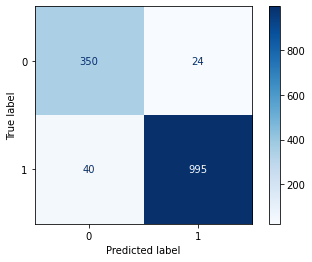

In [14]:
lr = LogisticRegression(max_iter=2000,penalty='l2')
model1=lr.fit(x_train, y_train)
print("train accuracy:",model1.score(x_train, y_train),"\n","test accuracy:",model1.score(x_test,y_test))
lrpred = lr.predict(x_test)
print("\n")
print("classification report for logistic regression")
print(classification_report(y_test,lrpred))
print("\n")
print("confusion matrix for logistic regression")
ConfusionMatrixDisplay.from_estimator(lr, x_test, y_test,cmap="Blues")

train accuracy: 0.9623713170039049 
 test accuracy: 0.9666430092264017


classification report for support vector machines 
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       374
           1       1.00      0.96      0.98      1035

    accuracy                           0.97      1409
   macro avg       0.95      0.97      0.96      1409
weighted avg       0.97      0.97      0.97      1409



confusion matrix for support vector machines


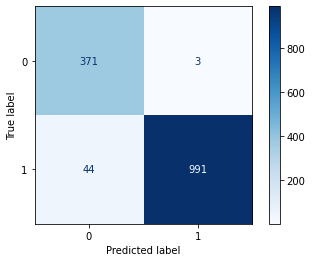

In [15]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
svm =SVC()
model2=svm.fit(x_train, y_train)
print("train accuracy:",model2.score(x_train, y_train),"\n","test accuracy:",model2.score(x_test,y_test))
svmpred = svm.predict(x_test)
print("\n")
print("classification report for support vector machines ")
print(classification_report(y_test,svmpred))
print("\n")
print("confusion matrix for support vector machines")
ConfusionMatrixDisplay.from_estimator(svm, x_test, y_test,cmap="Blues")

In [16]:
from sklearn.tree import DecisionTreeClassifier 

train accuracy: 0.996272630457934 
 test accuracy: 0.9595457771469127


classification report for decision tree classifier
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       374
           1       0.97      0.97      0.97      1035

    accuracy                           0.96      1409
   macro avg       0.95      0.95      0.95      1409
weighted avg       0.96      0.96      0.96      1409



confusion matrix for decision tree classifier


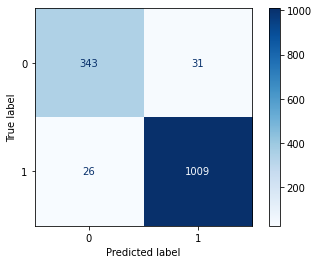

In [17]:
dt=DecisionTreeClassifier()
model3=dt.fit(x_train, y_train)
print("train accuracy:",model3.score(x_train, y_train),"\n","test accuracy:",model3.score(x_test,y_test))

dtpred = dt.predict(x_test)
print("\n")
print("classification report for decision tree classifier")
print(classification_report(y_test,dtpred))
print("\n")
print("confusion matrix for decision tree classifier")
ConfusionMatrixDisplay.from_estimator(dt, x_test, y_test,cmap="Blues")

In [18]:
from sklearn.neighbors import KNeighborsClassifier

train accuracy: 0.959410485624547 
 test accuracy: 0.9261887863733144


classification report for KNN classifier
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       374
           1       0.97      0.93      0.95      1035

    accuracy                           0.93      1409
   macro avg       0.90      0.92      0.91      1409
weighted avg       0.93      0.93      0.93      1409



confusion matrix for KNN classifier


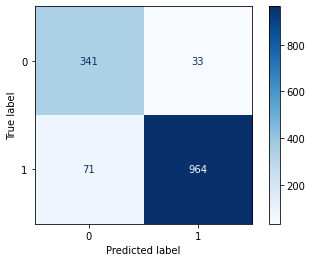

In [19]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_sm, y_sm)
print("train accuracy:",knn_model.score(X_sm, y_sm),"\n","test accuracy:",knn_model.score(X_test,y_test))

knn_modelpred = knn_model.predict(X_test)
print("\n")
print("classification report for KNN classifier")
print(classification_report(y_test,knn_modelpred))
print("\n")
print("confusion matrix for KNN classifier")
ConfusionMatrixDisplay.from_estimator(knn_model, X_test, y_test,cmap="Blues")

train accuracy: 0.9971007489731819 
 test accuracy: 0.9687721788502484


classification report for random forest classifier
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       374
           1       0.98      0.97      0.98      1035

    accuracy                           0.97      1409
   macro avg       0.96      0.97      0.96      1409
weighted avg       0.97      0.97      0.97      1409



confusion matrix for random forest classifier


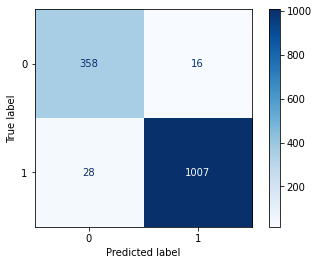

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=1234)
model4=rf.fit(X_sm, y_sm)
print("train accuracy:",model4.score(X_sm, y_sm),"\n","test accuracy:",model4.score(X_test,y_test))

rfpred = rf.predict(X_test)
print("\n")
print("classification report for random forest classifier")
print(classification_report(y_test,rfpred))
print("\n")
print("confusion matrix for random forest classifier")
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test,cmap="Blues")

train accuracy: 0.9971007489731819 
 test accuracy: 0.9687721788502484


classification report for random forest classifier
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       374
           1       0.98      0.97      0.98      1035

    accuracy                           0.97      1409
   macro avg       0.96      0.97      0.96      1409
weighted avg       0.97      0.97      0.97      1409



confusion matrix for random forest classifier
   Gender  Senior_Citizen  Tenure_Months  Phone_Service  Internet_Service  \
0       1               0             28              1                 1   

   Streaming TV  Streaming Movies  Contract  Payment Method  Monthly Charges  \
0             1                 1         0               1            104.8   

   Total_Charges  
0        3046.05  
[1]


C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


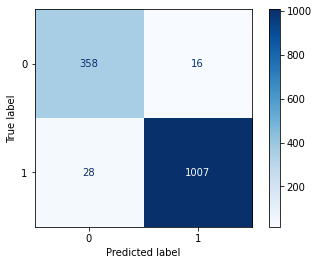

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

telecom.dropna(inplace=True)

# Split data into training and testing sets
X = telecom.drop('Churn', axis=1)
# print(X)
y = telecom['Churn']
# print(y)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=1234)
model4=rf.fit(X_sm, y_sm)
print("train accuracy:",model4.score(X_sm, y_sm),"\n","test accuracy:",model4.score(X_test,y_test))

rfpred = rf.predict(X_test)
print("\n")
print("classification report for random forest classifier")
print(classification_report(y_test,rfpred))
print("\n")
print("confusion matrix for random forest classifier")
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test,cmap="Blues")



new_data = pd.DataFrame({'Gender': 'Female', 
                         'Senior_Citizen': 'No', 
                         'Tenure_Months': 28,
                         'Phone_Service': 'Yes',
                         'Internet_Service': 'Fiber optic',
                         'Streaming TV': 'Yes',
                         'Streaming Movies': 'Yes',
                         'Contract': 'Month-to-month',
                         'Payment Method': 'Electronic check',
                         'Monthly Charges': 104.8,
                         'Total_Charges': 3046.05}, index=[0])


# Map categorical columns
new_data['Gender'] = new_data['Gender'].map({'Male': 0, 'Female': 1})
new_data['Senior_Citizen'] = new_data['Senior_Citizen'].map({'Yes': 1, 'No': 0})
new_data['Phone_Service'] = new_data['Phone_Service'].map({'Yes': 1, 'No': 0})
new_data['Internet_Service'] = new_data['Internet_Service'].map({'No': 2, 'DSL': 0, 'Fiber optic': 1})
new_data['Contract'] = new_data['Contract'].map({'Month-to-month': 0, 'One year': 2, 'Two year': 1})
new_data['Payment Method'] = new_data['Payment Method'].map({'Mailed check': 0, 'Credit card (automatic)': 3, 'Bank transfer (automatic)': 2, 'Electronic check': 1})
new_data['Streaming TV'] = new_data['Streaming TV'].map({'Yes': 1, 'No': 0})
new_data['Streaming Movies'] = new_data['Streaming Movies'].map({'Yes': 1, 'No': 0})

print(new_data)
# Predict the target variable
new_prediction = rf.predict(new_data)
print(new_prediction)

In [22]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf.fit(X_sm,y_sm)
y_pred=model_rf.predict(X_test)
model_rf.score(X_test,y_test)

0.9701916252661462

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=1234)
new_data = pd.DataFrame({'Gender': ['Male'], 
                         'Senior_Citizen': ['No'], 
                         'Tenure_Months': [2],
                         'Phone_Service': ['DSL'],
                         'Internet_Service': ['No'],
                         'Streaming TV': ['No'],
                         'Streaming Movies': ['No'],
                         'Contract': ['Month-to-month'],
                         'Payment Method': ['Mailed check'],
                         'Monthly Charges': [53],
                         'Total_Charges': [108]})

# Check for missing values
if new_data.isnull().sum().sum() > 0:
    print("There are missing values in the new data.")
    
else:
    # One-Hot Encoding for categorical variables
    for col in new_data.columns:
        if new_data[col].dtype == 'object':
            new_data[col], _ = pd.factorize(new_data[col])
    
    # Ensure the same columns are present in the new data as in the training data
    missing_cols = set(x_train.columns) - set(new_data.columns)
    for c in missing_cols:
        new_data[c] = 0
    new_data = new_data[x_train.columns]
    
    rf.fit(x_train, y_train) # fit the model with X_train and y_train
    new_prediction = rf.predict(new_data)

    # Predict the churn status
    new_prediction = rf.predict(new_data)
    print(new_prediction)


[0]


Accuracy: 0.9673527324343506
Confusion Matrix:
 [[ 359   22]
 [  24 1004]]


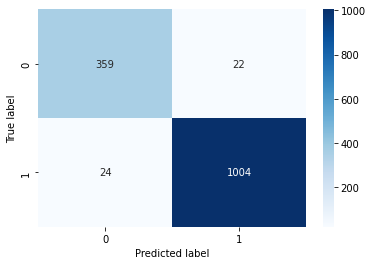

In [25]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(telecom.drop(['Churn'], axis=1), telecom['Churn'], test_size=0.2, random_state=123)

# Build the XGBoost model
model = xgb.XGBClassifier(n_jobs=-1, random_state=123)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [26]:
from sklearn.model_selection import RandomizedSearchCV
# XGBoost clasifier
from xgboost import XGBClassifier
xg = XGBClassifier(objective='binary:logistic')


In [27]:
param_grid={
    'learning_rate':[1,0.5,0.1,0.01],
    'max_depth':[3,5,10,20],
    'n_estimators':[10,50,100,200]
}

In [28]:
grid = RandomizedSearchCV(XGBClassifier(objective='binary:logistic'), param_grid, verbose=3)

In [29]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.970 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.965 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.968 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.968 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.979 total time=   0.0s
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=200;, score=0.970 total time=   0.4s
[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=200;, score=0.954 total time=   0.3s
[CV 3/5] END learning_rate=1, max_depth=3, n_estimators=200;, score=0.965 total time=   0.3s
[CV 4/5] END learning_rate=1, max_depth=3, n_estimators=200;, score=0.962 total time=   0.3s
[CV 5/5] END learning_rate=1, max_depth=3, n_estimators=200;, score=0.978 total time=   0.3s

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   param_distributions={'learning_rate': [1, 0.5, 0.1, 0.01],
                                        'max_depth': [3, 5, 10, 20],
                                        'n_estimators': [10, 50, 100, 200]},
                   verbose=3)

In [30]:
grid.best_params_


{'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.01}

In [31]:
xg = XGBClassifier(n_estimators= 100, max_depth= 5, learning_rate= 0.1)
xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [33]:
# checking accuracy of test dataset
print("testing accuracy is : ", xg.score(X_test, y_test)*100)

testing accuracy is :  97.01916252661462


In [34]:
categorical_cols= telecom.select_dtypes(include=['object'])

print(f'The dataset contains {len(categorical_cols.columns.tolist())} categorical columns')



The dataset contains 0 categorical columns


In [35]:
##categorical_cols.describe()

In [36]:
for cols in categorical_cols.columns:
  print(cols,':', len(categorical_cols[cols].unique()),'labels')

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import LinearSVC
svm =LinearSVC()
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the churn dataset
telecom = pd.read_csv("training_data.csv")

# Split the data into features (X) and target (y)
X = telecom.drop("Churn", axis=1)
y = telecom["Churn"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Train the base models on the training data
rf_model = RandomForestClassifier(random_state=1234)
rf_model.fit(X_train, y_train)

xgb_model = xgb.XGBClassifier(random_state=1234)
xgb_model.fit(X_train, y_train)

svm_model = LinearSVC(random_state=1234)
svm_model.fit(X_train, y_train)

nn_model = MLPClassifier(random_state=1234)
nn_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

lr_model = LogisticRegression(random_state=1234)
lr_model.fit(X_train, y_train)

dt_model = DecisionTreeClassifier(random_state=1234)
dt_model.fit(X_train, y_train)

# Use the base models to make predictions on the test data
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
svm_preds = svm_model.predict(X_test)
nn_preds = nn_model.predict(X_test)
knn_preds = knn_model.predict(X_test)
lr_preds = lr_model.predict(X_test)
dt_preds = dt_model.predict(X_test)

# Combine the predictions from the base models into a new feature set
base_predictions = np.column_stack((rf_preds, xgb_preds, svm_preds, nn_preds, knn_preds, lr_preds, dt_preds))

# Train a higher-level machine learning model on the combined feature set
stacked_model = LogisticRegression (random_state=1234)
stacked_model.fit(base_predictions, y_test)


ValueError: could not convert string to float: 'Huntington Beach'

In [ ]:
# Calculate the accuracy of each base model
rf_accuracy = accuracy_score(y_test, rf_preds)
xgb_accuracy = accuracy_score(y_test, xgb_preds)
svm_accuracy = accuracy_score(y_test, svm_preds)
nn_accuracy = accuracy_score(y_test, nn_preds)
knn_accuracy = accuracy_score(y_test, knn_preds)
lr_accuracy = accuracy_score(y_test, lr_preds)
dt_accuracy = accuracy_score(y_test, dt_preds)

# Calculate the accuracy of the stacked model
stacked_predictions = stacked_model.predict(base_predictions)
stacked_accuracy = accuracy_score(y_test, stacked_predictions)

# Print the accuracy of each model
print("Random Forest Accuracy: ", rf_accuracy)
print("XG Boosting Accuracy: ", xgb_accuracy)
print("Support Vector Machines Accuracy: ", svm_accuracy)
print("Neural Network Accuracy: ", nn_accuracy)
print("K-Nearest Neighbors Accuracy: ", knn_accuracy)
print("Logistic Regression Accuracy: ", lr_accuracy)
print("Decision Tree Accuracy: ", dt_accuracy)
print("Stacked Model Accuracy: ", stacked_accuracy)


In [ ]:
import matplotlib.pyplot as plt

# Plot the accuracy of each model
bar_width = 0.1

rf_bar = plt.bar(0, rf_accuracy, bar_width, color='blue')
xgb_bar = plt.bar(1 * bar_width, xgb_accuracy, bar_width, color='red')
svm_bar = plt.bar(2 * bar_width, svm_accuracy, bar_width, color='green')
nn_bar = plt.bar(3 * bar_width, nn_accuracy, bar_width, color='purple')
knn_bar = plt.bar(4 * bar_width, knn_accuracy, bar_width, color='orange')
lr_bar = plt.bar(5 * bar_width, lr_accuracy, bar_width, color='brown')
dt_bar = plt.bar(6 * bar_width, dt_accuracy, bar_width, color='pink')
stacked_bar = plt.bar(7 * bar_width, stacked_accuracy, bar_width, color='yellow')

# Add labels and title to the plot
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.title('Accuracy of Base Models and Stacked Model')

# Modify the legend
plt.legend((rf_bar, xgb_bar, svm_bar, nn_bar, knn_bar, lr_bar, dt_bar, stacked_bar), 
           ('Random Forest', 'XG Boosting', 'SVM', 'Neural Network', 'KNN', 'Logistic Regression', 'Decision Tree', 'Stacked Model'),
           loc='center', bbox_to_anchor=(0.5, -0.35), ncol=2)


# Show the plot
plt.show()


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, matthews_corrcoef


# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot the confusion matrix for each model
models = [("Random Forest", rf_preds), 
          ("XG Boosting", xgb_preds), 
          ("Support Vector Machines", svm_preds), 
          ("Neural Network", nn_preds), 
          ("K-Nearest Neighbors", knn_preds), 
          ("Logistic Regression", lr_preds), 
          ("Decision Tree", dt_preds), 
          ("Stacked Model", stacked_predictions)]

classes = ['Churned', 'Not Churned']

plt.figure(figsize=(15, 15))
for i, (name, preds) in enumerate(models):
    plt.subplot(4, 2, i+1)
    plot_confusion_matrix(y_test, preds, classes=classes, title=f"{name} Confusion Matrix")
    accuracy = accuracy_score(y_test, preds)
    plt.title(f"{name} - Accuracy: {accuracy:.3f}")
plt.tight_layout()
plt.show()



NameError: name 'rf_preds' is not defined

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, matthews_corrcoef

# Base models
print("Random Forest:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_preds))
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("F1 Score:", f1_score(y_test, rf_preds))
print("Recall:", recall_score(y_test, rf_preds))
print("MCC:", matthews_corrcoef(y_test, rf_preds))

print("\nXGBoost:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_preds))
print("Accuracy:", accuracy_score(y_test, xgb_preds))
print("F1 Score:", f1_score(y_test, xgb_preds))
print("Recall:", recall_score(y_test, xgb_preds))
print("MCC:", matthews_corrcoef(y_test, xgb_preds))

print("\nSVM:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_preds))
print("Accuracy:", accuracy_score(y_test, svm_preds))
print("F1 Score:", f1_score(y_test, svm_preds))
print("Recall:", recall_score(y_test, svm_preds))
print("MCC:", matthews_corrcoef(y_test, svm_preds))

print("\nNeural Network:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, nn_preds))
print("Accuracy:", accuracy_score(y_test, nn_preds))
print("F1 Score:", f1_score(y_test, nn_preds))
print("Recall:", recall_score(y_test, nn_preds))
print("MCC:", matthews_corrcoef(y_test, nn_preds))

print("\nKNN:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, knn_preds))
print("Accuracy:", accuracy_score(y_test, knn_preds))
print("F1 Score:", f1_score(y_test, knn_preds))
print("Recall:", recall_score(y_test, knn_preds))
print("MCC:", matthews_corrcoef(y_test, knn_preds))

print("\nLogistic Regression:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_preds))
print("Accuracy:", accuracy_score(y_test, lr_preds))
print("F1 Score:", f1_score(y_test, lr_preds))
print("Recall:", recall_score(y_test, lr_preds))
print("MCC:", matthews_corrcoef(y_test, lr_preds))


print("\nDecision Tree:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_preds))
print("Accuracy:", accuracy_score(y_test, dt_preds))
print("F1 Score:", f1_score(y_test, dt_preds))
print("Recall:", recall_score(y_test, dt_preds))
print("MCC:", matthews_corrcoef(y_test, dt_preds))

print("\nStacked Model:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, stacked_predictions))
print("Accuracy:", accuracy_score(y_test, stacked_predictions))
print("F1 Score:", f1_score(y_test, stacked_predictions))
print("Recall:", recall_score(y_test, stacked_predictions))
print("MCC:", matthews_corrcoef(y_test, stacked_predictions))






Random Forest:
Confusion Matrix:


NameError: name 'rf_preds' is not defined

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
#train the model
model = Sequential()
model.add(Dense(32, input_shape=(x_train.shape[1],), activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(32, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(16, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(8, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(4, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(1, activation='sigmoid'))

In [ ]:
opt = Adam(learning_rate=0.0001)
earlystopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',patience=15, verbose=1,restore_best_weights=True)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(X_sm, y_sm, batch_size=32, epochs=200,validation_split = 0.15, callbacks = [earlystopper],verbose = 1)
history_dict = history.history

In [ ]:
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

In [ ]:
accuracy_values = history_dict['accuracy']
val_accuracy_values=history_dict['val_accuracy']
plt.plot(val_accuracy_values,'-r',label='val_accuracy')
plt.plot(accuracy_values,'-b',label='accuracy')
plt.legend()
plt.xlabel("Epochs")

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred = [1 if x == True else 0 for x in y_pred]

In [ ]:
print(confusion_matrix(y_test, y_pred))
print("Accuracy : ", accuracy_score(y_test, y_pred) *  100)
print("Recall : ", recall_score(y_test, y_pred) *  100)

print("F1 : ", f1_score(y_test, y_pred) *  100)
print("ROC AUC : ", roc_auc_score(y_test, y_pred) *  100)